# Verify_DataFile_Changes
## Notebook based on GPS_Cadance_Compare with elements from other repos' codes 

In [37]:
import sys
import matplotlib
if 'matplotlib.pyplot' not in sys.modules.keys():
    matplotlib.use("Agg")
import matplotlib.pyplot as plt
import json
import numpy as np
import pickle 

%matplotlib notebook


key115_dct = {'shieldID': 'shieldID', \
              'imuTime': 'imuPlot', 'sweepTime': 'sweepPlot', 'sweepTimeLn': 'sweepTimeLPlot', \
              'ax': 'axPlot', 'ay': 'ayPlot', 'az': 'azPlot', \
              'gx': 'gxPlot', 'gy': 'gyPlot', 'gz': 'gzPlot', \
              'mx': 'mxPlot', 'my': 'myPlot', 'mz': 'mzPlot', \
              'pip0nA': 'pip0Plot', 'pip1nA': 'pip1Plot', \
              'pip0VLn': 'pip0LPlot', 'pip1VLn': 'pip1LPlot'}


key_dct = key115_dct.copy()
key_dct['interruptArray'] = 'interruptArray'

def get_origpickles(path, file_name, tref="Reg", version="Original", DeltInx=[100, 300, 200], params=None):
    import pickle
    pklfname = path+"%sTimeParsedData_wDInx%sto%s-%s-%s.pkl" % (tref.capitalize(), DeltInx[0], DeltInx[1], file_name.partition(".")[0], version)
    pklf = open(pklfname, "rb")
    dct = pickle.load(pklf)
    pklf.close()
    print pklfname
    if params is None: 
        return dct 
    else: 
        return [dct[key] for key in params]

def get_orig115kpickles(path, file_name, DeltInx=[100, 300, 200], params=None):
    import pickle
    pklfname = path+"ParsedData_wDInx%sto%s-%s.pkl" % (DeltInx[0], DeltInx[1], file_name.partition(".")[0])
    pklf = open(pklfname, "rb")
    dct = pickle.load(pklf)
    pklf.close()
    print pklfname
    if params is None: 
        return dct 
    else: 
        return [dct[key] for key in params] 

def get_pickles(path, file_name, tref="Reg", version="Original", DeltInx=[100, 300, 200], params=None):
    import pickle
    pklfname = path+"%sTime-ParsedData_wDInx%sto%s-%s-%s.pkl" % (tref.capitalize(), DeltInx[0], DeltInx[1], file_name.partition(".")[0], version)
    pklf = open(pklfname, "rb")
    dct = pickle.load(pklf)
    pklf.close()
    print pklfname
    if params is None: 
        return dct 
    else: 
        return [dct[key] for key in params]

def get_115kpickles(path, file_name, tref="Reg", DeltInx=[100, 300, 200], params=None):
    import pickle
    pklfname = path+"%sTime-ParsedData_wDInx%sto%s-%s.pkl" % (tref.capitalize(), DeltInx[0], DeltInx[1], file_name.partition(".")[0])
    pklf = open(pklfname, "rb")
    dct = pickle.load(pklf)
    pklf.close()
    if params is None: 
        return dct 
    else: 
        return [dct[key] for key in params] 
    
def get_newpickles(path, file_name, tref="Reg", version="Original", params=None):
    import pickle
    pklfname = path+"%sTime_ParsedData-%s-%s.pkl" % (tref.capitalize(), file_name.partition(".")[0], version)
    pklf = open(pklfname, "rb")
    dct = pickle.load(pklf)
    pklf.close()
    if params is None: 
        return dct 
    else: 
        return [dct[key] for key in params]

def get_new115kpickles(path, file_name, tref="Reg", params=None):
    import pickle
    pklfname = path+"%sTime_ParsedData-%s.pkl" % (tref.capitalize(), file_name.partition(".")[0])
    pklf = open(pklfname, "rb")
    dct = pickle.load(pklf)
    pklf.close()
    if params is None: 
        return dct 
    else: 
        return [dct[key] for key in params]
    
def correct_flight_pickle_data(sweepTime, interruptArray, shieldID):
    ## Temporary Fixes for Flight data Pickle File Time Errors
    ### Temporary Fix for Time Problem in sweepTimeLn from pickle files 
    sweepSize = 28
    sweepStepDt = 0.02 / sweepSize
    sweepTimeLn = []
    for t in sweepTime:
        for n in range(0, sweepSize):
            sweepTimeLn.append(t+sweepStepDt*n)
    sweepTimeLn = np.array(sweepTimeLn)

    ### Temporary Fix for Time probelm in interruptArray from pickle files
    # All shields turned on at the same time, first accel for all mains at 572.732 seconds
    if np.any(shieldID == np.array([18, 19, 20, 21])): interruptArray = interruptArray - 572.732
    # First accel for shield 14 at 588.328 seconds
    elif shieldID == 14: interruptArray = interruptArray - 588.328
    # First accel for shield 16 at 577.271 seconds
    elif shieldID == 16: interruptArray = interruptArray - 577.271

    ### Temporarily Fix Time offset of interruptArray from the time reference of the rest of the measurements
    interruptArray = interruptArray - 8.00622  
    
    return sweepTimeLn, interruptArray

def get_flight_dataFile(shieldID, tref='Flight', data_ver='Original', DeltInx=[100, 300]):
    if np.any(shieldID == np.array([14, 16])): 
        path = './kinetx_data/dallas/'
        if shieldID == 14: file_name = tref+'TimeParsedData_wDInx%sto%s-Dallas1_FlightData_5-16-2021-%s.pkl' % (DeltInx[0], DeltInx[1], data_ver)
        else: file_name = tref+'TimeParsedData_wDInx%sto%s-Dallas4_FlightData_5-16-2021-%s.pkl' % (DeltInx[0], DeltInx[1], data_ver)
    else: 
        num_dct={18:1, 19:3, 20:2, 21:4}
        path = './kinetx_data/main/'
        file_name = tref+'TimeParsedData_wDInx%sto%s-Flight-data_file_230k_%s-05_16_21-%s.pkl' % (DeltInx[0], DeltInx[1], num_dct[shieldID], data_ver)
    return path+file_name

In [31]:
## Check 115k Files
path_lst = ['crex2_int/day06/']*4
file_lst = ['data_file_115k_usbserial-FT5RIYEN%s-PreVib_Seq.pkl' % (num) for num in np.arange(0,4,1)]
for path, file_name in zip(path_lst, file_lst): 
    dct_orig = get_orig115kpickles(path, file_name,params=None)
    dct_new = get_new115kpickles(path, file_name, tref="Reg", params=None)
    print 'Checking %s' % (file_name)
    for key in key115_dct: 
        if not np.all(np.array(dct_new[key])==np.array(dct_orig[key115_dct[key]])): 
            print key, 'Not Match!!!'
    print ''

Checking data_file_115k_usbserial-FT5RIYEN0-PreVib_Seq.pkl
sweepTimeLn Not Match!!!

Checking data_file_115k_usbserial-FT5RIYEN1-PreVib_Seq.pkl
sweepTimeLn Not Match!!!

Checking data_file_115k_usbserial-FT5RIYEN2-PreVib_Seq.pkl
pip0nA Not Match!!!
pip1nA Not Match!!!
sweepTimeLn Not Match!!!

Checking data_file_115k_usbserial-FT5RIYEN3-PreVib_Seq.pkl
pip0nA Not Match!!!
pip1nA Not Match!!!
sweepTimeLn Not Match!!!



In [59]:
## Check Delamere Bob Flight Files
path_lst = ['kinetx_data/dallas/']*2
file_lst = ['Dallas1_FlightData_5-16-2021.txt', 'Dallas4_FlightData_5-16-2021.txt']

for path, file_name in zip(path_lst, file_lst): 
    for version in ['Original', 'Repeat']:
        dct_orig = get_origpickles(path, file_name, tref="Flight", version=version, params=None)
        dct_orig['sweepTimeLn'], dct_orig['interruptArray_fixed'] = correct_flight_pickle_data(dct_orig[key_dct['sweepTime']], \
                                                                                               dct_orig[key_dct['interruptArray']], \
                                                                                               dct_orig[key_dct['shieldID']])
        dct_new = get_newpickles(path, file_name, tref="Flight", version=version, params=None)
        print 'Checking %s Data from %s' % (version, file_name)
        crt_lst = []
        for key in key_dct: 
            if np.any(np.array(dct_new[key]) != np.array(dct_orig[key_dct[key]])): 
#             if not np.all(np.array(dct_new[key])==np.array(dct_orig[key_dct[key]])): 
                print key, 'Not Match!!!'
                if key == 'sweepTimeLn' and np.all(np.array(dct_new[key])==np.array(dct_orig['sweepTimeLn'])): 
                    print '\t But its Correction Fits!'
                elif key == 'interruptArray' and np.all(np.array(dct_new[key])==np.array(dct_orig['interruptArray_fixed'])): 
                    print '\t But its Correction Fits!'
                if key == 'my': print '\t Original my values:', dct_orig[key_dct['my']]
            else: crt_lst.append(key)
        crt_lst.sort()
        print 'Variables That Match', ', '.join(crt_lst)
        print '******************'
    print ''


kinetx_data/dallas/FlightTimeParsedData_wDInx100to300-Dallas1_FlightData_5-16-2021-Original.pkl
Checking Original Data from Dallas1_FlightData_5-16-2021.txt
interruptArray Not Match!!!
	 But its Correction Fits!
sweepTimeLn Not Match!!!
	 But its Correction Fits!
Variables That Match ax, ay, az, gx, gy, gz, imuTime, mx, my, mz, pip0VLn, pip0nA, pip1VLn, pip1nA, shieldID, sweepTime
******************
kinetx_data/dallas/FlightTimeParsedData_wDInx100to300-Dallas1_FlightData_5-16-2021-Repeat.pkl
Checking Repeat Data from Dallas1_FlightData_5-16-2021.txt
interruptArray Not Match!!!
	 But its Correction Fits!
sweepTimeLn Not Match!!!
	 But its Correction Fits!
my Not Match!!!
	 Original my values: []
Variables That Match ax, ay, az, gx, gy, gz, imuTime, mx, mz, pip0VLn, pip0nA, pip1VLn, pip1nA, shieldID, sweepTime
******************



/Users/magda/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


kinetx_data/dallas/FlightTimeParsedData_wDInx100to300-Dallas4_FlightData_5-16-2021-Original.pkl
Checking Original Data from Dallas4_FlightData_5-16-2021.txt
interruptArray Not Match!!!
	 But its Correction Fits!
sweepTimeLn Not Match!!!
	 But its Correction Fits!
Variables That Match ax, ay, az, gx, gy, gz, imuTime, mx, my, mz, pip0VLn, pip0nA, pip1VLn, pip1nA, shieldID, sweepTime
******************
kinetx_data/dallas/FlightTimeParsedData_wDInx100to300-Dallas4_FlightData_5-16-2021-Repeat.pkl
Checking Repeat Data from Dallas4_FlightData_5-16-2021.txt
interruptArray Not Match!!!
	 But its Correction Fits!
sweepTimeLn Not Match!!!
	 But its Correction Fits!
my Not Match!!!
	 Original my values: []
Variables That Match ax, ay, az, gx, gy, gz, imuTime, mx, mz, pip0VLn, pip0nA, pip1VLn, pip1nA, shieldID, sweepTime
******************



In [25]:
loc = np.where(np.array(dct_new['my']) != np.array(dct_orig[key_dct['my']]))[0]
print loc
# print np.array(dct_orig[key_dct['my']])[loc]
# print dct_new['my'][loc]
dct_orig['myPlot']

[0]


/Users/magda/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


array([], shape=(0, 1), dtype=float64)

In [58]:
crt_lst

['ax',
 'ay',
 'az',
 'gx',
 'gy',
 'gz',
 'imuTime',
 'mx',
 'my',
 'mz',
 'pip0VLn',
 'pip0nA',
 'pip1VLn',
 'pip1nA',
 'shieldID',
 'sweepTime']

In [60]:
## Check Delamere Main Flight Files
file_lst = ['Flight-data_file_230k_%s-05_16_21.txt' % (num) for num in np.arange(1,5,1)]
path_lst = ['kinetx_data/main/']*len(file_lst)
# path_lst = ['kinetx_data/main/']
# file_lst = ['Flight-data_file_230k_2-05_16_21.txt']

for path, file_name in zip(path_lst, file_lst): 
#     crt_dct = {'Original': [], 'Repeat': []}
    for version in ['Original', 'Repeat']:
        dct_orig = get_origpickles(path, file_name, tref="Flight", version=version, params=None)
        dct_orig['sweepTimeLn'], dct_orig['interruptArray_fixed'] = correct_flight_pickle_data(dct_orig[key_dct['sweepTime']], \
                                                                                               dct_orig[key_dct['interruptArray']], \
                                                                                               dct_orig[key_dct['shieldID']])
        dct_new = get_newpickles(path, file_name, tref="Flight", version=version, params=None)
        print 'Checking %s Data from %s' % (version, file_name)
        crt_lst = []
        for key in key_dct: 
#             if not np.all(np.array(dct_new[key])== np.array(dct_orig[key_dct[key]])): 
            if np.any(np.array(dct_new[key]) != np.array(dct_orig[key_dct[key]])): 
                print key, 'Not Match!!!'
                if key == 'sweepTimeLn' and np.all(np.array(dct_new[key])==np.array(dct_orig['sweepTimeLn'])): 
                    print '\t But its Correction Fits!'
                elif key == 'interruptArray' and np.all(np.array(dct_new[key])==np.array(dct_orig['interruptArray_fixed'])): 
                    print '\t But its Correction Fits!'
                if key == 'my': print '\t Original my values:', dct_orig[key_dct['my']]
            else: crt_lst.append(key)
#             if np.any(np.array(dct_new[key]) != np.array(dct_orig[key_dct[key]])): 
#                 print key, 'Confirm Not Match!!!'
        crt_lst.sort()
        print 'Variables That Match', ', '.join(crt_lst)    
        print '******************'
    print ''



kinetx_data/main/FlightTimeParsedData_wDInx100to300-Flight-data_file_230k_1-05_16_21-Original.pkl
Checking Original Data from Flight-data_file_230k_1-05_16_21.txt
interruptArray Not Match!!!
	 But its Correction Fits!
sweepTimeLn Not Match!!!
	 But its Correction Fits!
Variables That Match ax, ay, az, gx, gy, gz, imuTime, mx, my, mz, pip0VLn, pip0nA, pip1VLn, pip1nA, shieldID, sweepTime
******************
kinetx_data/main/FlightTimeParsedData_wDInx100to300-Flight-data_file_230k_1-05_16_21-Repeat.pkl
Checking Repeat Data from Flight-data_file_230k_1-05_16_21.txt
interruptArray Not Match!!!
	 But its Correction Fits!
sweepTimeLn Not Match!!!
	 But its Correction Fits!
my Not Match!!!
	 Original my values: []
Variables That Match ax, ay, az, gx, gy, gz, imuTime, mx, mz, pip0VLn, pip0nA, pip1VLn, pip1nA, shieldID, sweepTime
******************



/Users/magda/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:17: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


kinetx_data/main/FlightTimeParsedData_wDInx100to300-Flight-data_file_230k_2-05_16_21-Original.pkl
Checking Original Data from Flight-data_file_230k_2-05_16_21.txt
interruptArray Not Match!!!
	 But its Correction Fits!
sweepTimeLn Not Match!!!
	 But its Correction Fits!
Variables That Match ax, ay, az, gx, gy, gz, imuTime, mx, my, mz, pip0VLn, pip0nA, pip1VLn, pip1nA, shieldID, sweepTime
******************
kinetx_data/main/FlightTimeParsedData_wDInx100to300-Flight-data_file_230k_2-05_16_21-Repeat.pkl
Checking Repeat Data from Flight-data_file_230k_2-05_16_21.txt
interruptArray Not Match!!!
	 But its Correction Fits!
sweepTimeLn Not Match!!!
	 But its Correction Fits!
my Not Match!!!
	 Original my values: []
Variables That Match ax, ay, az, gx, gy, gz, imuTime, mx, mz, pip0VLn, pip0nA, pip1VLn, pip1nA, shieldID, sweepTime
******************

kinetx_data/main/FlightTimeParsedData_wDInx100to300-Flight-data_file_230k_3-05_16_21-Original.pkl
Checking Original Data from Flight-data_file_230k_

In [39]:
dct_orig['myPlot']

pklfname = get_flight_dataFile(shieldID=18, tref='Flight', data_ver='Repeat')
pklf = open(pklfname, "rb")
dct = pickle.load(pklf)
dct['myPlot']

array([], shape=(0, 1), dtype=float64)

In [40]:
matplotlib.use('nbagg')
import matplotlib.cm as cm
import scipy.signal as sig
from scipy.interpolate import interp1d
from scipy.io import savemat, loadmat
from __future__ import division

mission = 'Delamere'
ver = "Original"

path_lst = ["./Pre-Shipment Bob Tests/"]*2
file_lst = ["data_file_230k-Shield14_Bob-02_09_21.txt", "data_file_230k-Shield16_Bob-02_09_21.txt"]
gps_type = ['GPSsim']*2
path_lst.extend(["./wallops_intDel/20210401_GPS_Rollout-Dallas/"]*2)
file_lst.extend(["Dallas1_R4_GPSRollout_4-1-2021.txt", "Dallas4_R4_GPSRollout_4-1-2021.txt"] )
gps_type.extend(['Rollout GPS']*2)

path_lst = ["./Pre-Shipment Bob Tests/", "./wallops_intDel/20210401_GPS_Rollout-Dallas/"]*2
file_lst = ["data_file_230k-Shield14_Bob-02_09_21.txt", "Dallas1_R4_GPSRollout_4-1-2021.txt", \
           "data_file_230k-Shield16_Bob-02_09_21.txt", "Dallas4_R4_GPSRollout_4-1-2021.txt"]
gps_type = ['GPSsim', 'Rollout GPS']*2

dots = True

gs_left = plt.GridSpec(len(file_lst), 2,  hspace=0.7)

# Set up dots or not more cleanly
line_style = '-'
if dots:
    line_style = '.'

markersize = 1
#Y-Axes' Limits
ylims_lst = [None]*len(file_lst)
ylims_lst = [[22,22.6]]*2 #, [21,23]]
ylims_lst.extend([[19, 48]]*2) #, [19, 49]])
#2nd plot config
ylims_lst = [[22,22.6], [19, 48]]*2

xlims = None
# xlims = [5000, 5200] #Zoom in to see just a few GPS interupts

fig = plt.figure(figsize=(10, 7.5))

inx = 0
for path, file_name, ylims, gps_str in zip(path_lst, file_lst, ylims_lst, gps_type):
    imuPlot, sweepPlot, shieldID = get_pickles(path, file_name, tref='Reg', version=ver, params=['imuTime', 'sweepTime', 'shieldID'])

    # Cadence (sweep on top)
    axis2 = fig.add_subplot(gs_left[inx,0])
    plt.plot(np.diff(imuPlot*1E3), line_style, color='blue', markersize=markersize)
    plt.plot(np.diff(sweepPlot)*1E3, line_style, color='red', markersize=markersize)
    plt.ylim(ylims)
    plt.xlim(xlims)
    plt.ylabel("Cadences (ms)\n IMU-Blue\n Sweep-Red")
    plt.xlabel("Index")
    plt.title('%s: Shield%s' % (gps_str, shieldID))
    print ("%s: 1 Done" % (inx))

    # Cadence (imu on top)
    fig.add_subplot(gs_left[inx,1], sharex=axis2, sharey=axis2)
    plt.plot(np.diff(sweepPlot)*1E3, line_style, color='red', markersize=markersize)
    plt.plot(np.diff(imuPlot*1E3), line_style, color='blue', markersize=markersize)
    plt.ylim(ylims)
    plt.title('%s: Shield%s' % (gps_str, shieldID))
    plt.xlim(xlims)
    plt.xlabel("Index")
    print ("%s: 2 Done" % (inx))
    
    inx = inx + 1

fig.suptitle('%s Mission Shields' % (mission))
plt.show()

<IPython.core.display.Javascript object>

IOError: [Errno 2] No such file or directory: './Pre-Shipment Bob Tests/RegTime-ParsedData_wDInx100to300-data_file_230k-Shield14_Bob-02_09_21-Original.pkl'

<IPython.core.display.Javascript object>


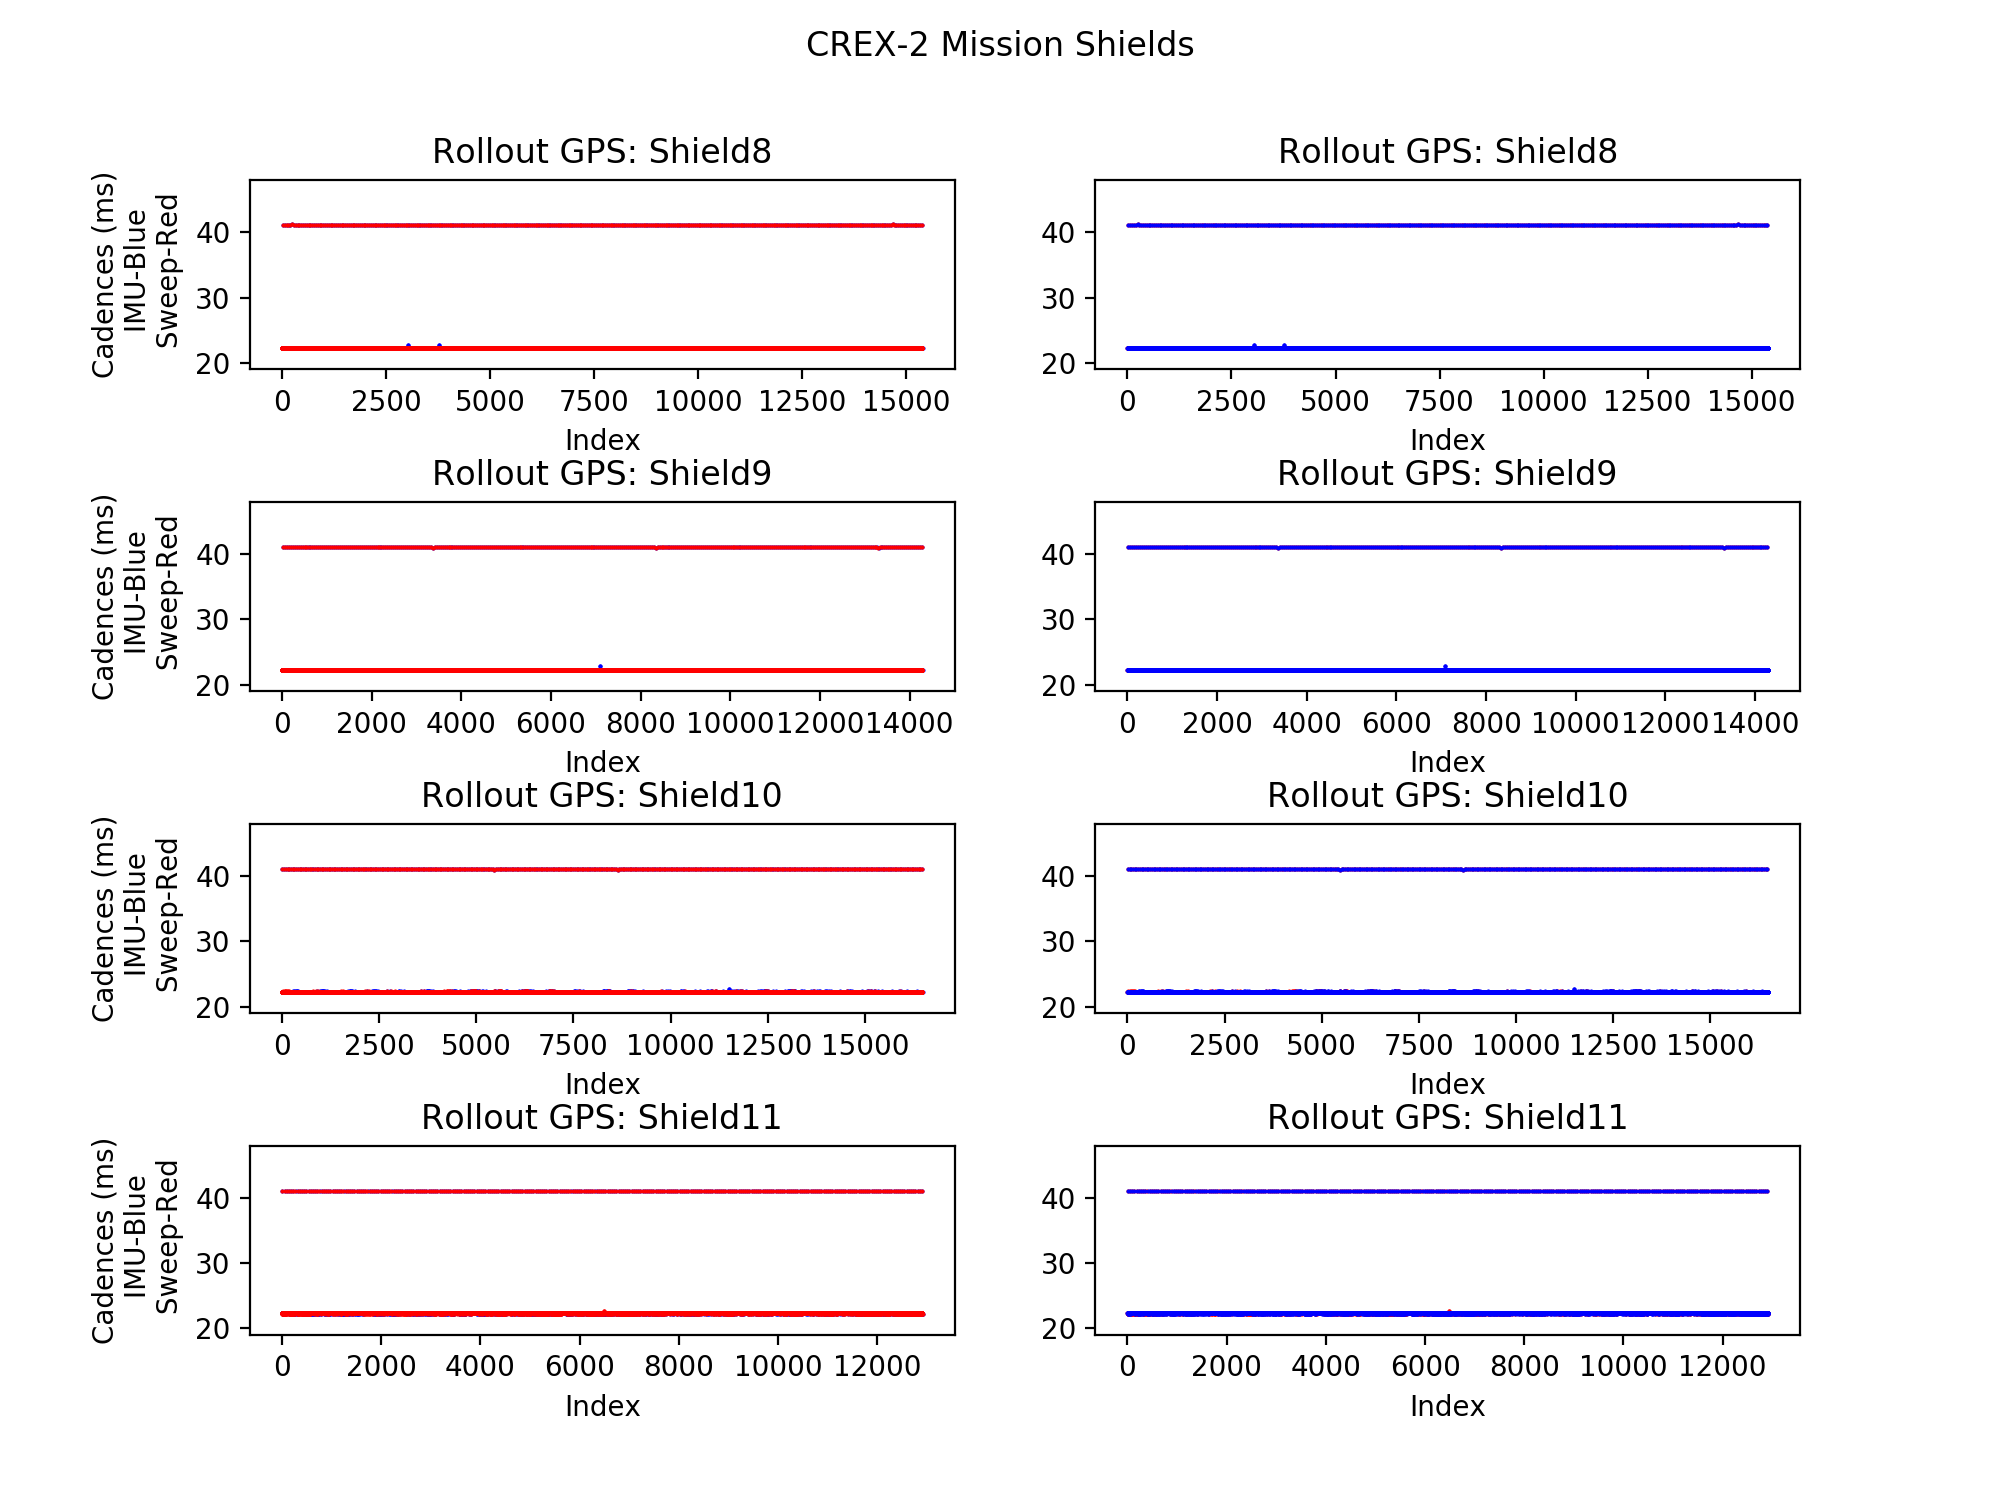

0: 1 Done
0: 2 Done
1: 1 Done
1: 2 Done
2: 1 Done
2: 2 Done
3: 1 Done
3: 2 Done


In [8]:
matplotlib.use('nbagg')
import matplotlib.cm as cm
import scipy.signal as sig
from scipy.interpolate import interp1d
from scipy.io import savemat, loadmat
from __future__ import division

mission = 'CREX-2'
fname_fmt = "data_file_115k_usbserial-FT5RIYEN%s-20210827_gps_rollout.txt"
path_lst = ["./crex2_int/day10/"]*4
file_lst = [fname_fmt % (num) for num in [1, 2, 0, 3]]
gps_type = ['Rollout GPS']*4

dots = True

gs_left = plt.GridSpec(len(file_lst), 2,  hspace=0.7)

# Set up dots or not more cleanly
line_style = '-'
if dots:
    line_style = '.'

markersize = 1
#Y-Axes' Limits
ylims_lst = [None]*len(file_lst)
# ylims_lst = [[22,22.6]]*2 #, [21,23]]
# ylims_lst.extend([[19, 48]]*2) #, [19, 49]])
# #2nd plot config
# ylims_lst = [[22,22.6], [19, 48]]*2
ylims_lst = [[19, 48]]*4

xlims = None
# xlims = [5000, 5200] #Zoom in to see just a few GPS interupts

fig = plt.figure(figsize=(10, 7.5))

inx = 0
for path, file_name, ylims, gps_str in zip(path_lst, file_lst, ylims_lst, gps_type):
    imuPlot, sweepPlot, shieldID = get_115kpickles(path, file_name, tref="Reg", params=['imuTime', 'sweepTime', 'shieldID'])

    # Cadence (sweep on top)
    axis2 = fig.add_subplot(gs_left[inx,0])
    plt.plot(np.diff(imuPlot*1E3), line_style, color='blue', markersize=markersize)
    plt.plot(np.diff(sweepPlot)*1E3, line_style, color='red', markersize=markersize)
    plt.ylim(ylims)
    plt.xlim(xlims)
    plt.ylabel("Cadences (ms)\n IMU-Blue\n Sweep-Red")
    plt.xlabel("Index")
    plt.title('%s: Shield%s' % (gps_str, shieldID))
    print ("%s: 1 Done" % (inx))

    # Cadence (imu on top)
    fig.add_subplot(gs_left[inx,1], sharex=axis2, sharey=axis2)
    plt.plot(np.diff(sweepPlot)*1E3, line_style, color='red', markersize=markersize)
    plt.plot(np.diff(imuPlot*1E3), line_style, color='blue', markersize=markersize)
    plt.ylim(ylims)
    plt.title('%s: Shield%s' % (gps_str, shieldID))
    plt.xlim(xlims)
    plt.xlabel("Index")
    print ("%s: 2 Done" % (inx))
    
    inx = inx + 1

fig.suptitle('%s Mission Shields' % (mission))
plt.show()